# Finite Difference Method for 1.Order Ordinary Differential Equation (ODE)

<br> **Objective:** Implementing a *finite difference method (FDM)* for solving the 1.order ordinary differential equation.
<br>
<br> As an example, we will solve the 1.order ODE of **df/dt = exp(t)**. <br> We will then compare the results by *plotting graphs and calculate the root mean squared errors* to determine how good the approximation is.

## Forward Euler Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Forward Euler Method 
# Interval 
Interval_min = -5
Interval_max = 5
Delta_T= 0.5
n = int(abs((Interval_max - Interval_min)/Delta_T))
#Points = np.linspace(Interval_min , Interval_max, n)
Points = np.arange(Interval_min, Interval_max, Delta_T)
Points = np.append(Points, Interval_max)
function = lambda t : np.exp(t)

# Euler Forward Method of solving Ordinary Differential Equation 
Result = []
for i in range(len(Points)-1):
    x = (function(Points[i+1])-function(Points[i]))/Delta_T
    Result.append(x)
#End Point 
end_point= (function(Points[-1]+Delta_T) - function(Points[-1]))/Delta_T
Result.append(end_point)

In [2]:
print(Result)

[0.008742099078313678, 0.014413284700983745, 0.023763489067168644, 0.03917936989109089, 0.06459586051206971, 0.1065005692254278, 0.17558975382363423, 0.28949856204602503, 0.4773024370823822, 0.7869386805747332, 1.2974425414002564, 2.139121115517834, 3.526814483758039, 5.814734057185172, 9.586875723545646, 15.80608592496839, 26.059830071009287, 42.96539614890385, 70.83796253475515, 116.79205560410958, 192.55754632328757]


## Analytical Solution

<br> The *analytical solved 1.order ODE solution* of this particular example is **f(t) = exp(t)**. 

In [3]:
# "analytic" as a list of the real analytical solution to the 1.order ODE evaluated in each stencil points.
analytic = []
for i in Points:
    x = function(i)
    analytic.append(x)


In [4]:
print(analytic)

[0.006737946999085467, 0.011108996538242306, 0.01831563888873418, 0.0301973834223185, 0.049787068367863944, 0.0820849986238988, 0.1353352832366127, 0.22313016014842982, 0.36787944117144233, 0.6065306597126334, 1.0, 1.6487212707001282, 2.718281828459045, 4.4816890703380645, 7.38905609893065, 12.182493960703473, 20.085536923187668, 33.11545195869231, 54.598150033144236, 90.01713130052181, 148.4131591025766]


### Graphing the Solutions 

<br> Graphing the solutions from **Forward Euler Method** and the **analytical solved solution**. 

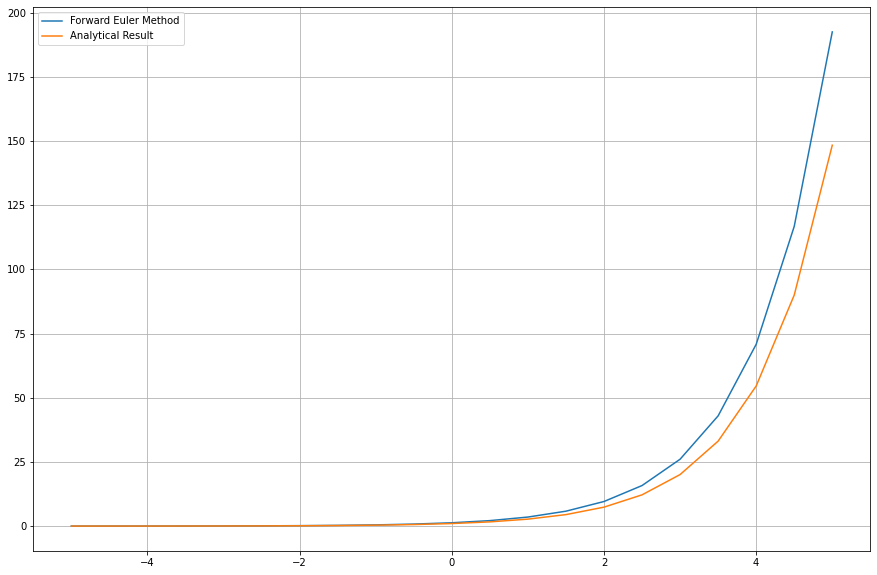

In [5]:
plt.figure(figsize=(15,10))
plt.plot(Points, Result, label="Forward Euler Method")
plt.plot(Points, analytic, label="Analytical Result")
plt.grid()
plt.legend(["Forward Euler Method", "Analytical Result"])
plt.show()

## Central Differencing Scheme
<br> The **central differencing scheme** has a better approximation or higher degree of accuracy than the normal **Forward Euler Method** in solving the first order ODE for this particular example.

In [6]:
# Central Difference for Finite Difference Method
central_diff_result = [ ]
#Dimensions Equalization

#Left Side -- Variable / First Point of the Interval
left_side = (function(Points[1])-function(Points[0]-Delta_T))/(2*Delta_T)
central_diff_result.append(left_side)

#Stencil Points between the First and End Point
for i in range(1,len(Points)-1):
    central_diff = (function(Points[i+1]) - function(Points[i-1]))/(2*Delta_T)
    central_diff_result.append(central_diff)

#Right Side -- Variable / End or Last Point of the Interval
right_side = (function(Points[-1]+Delta_T) - function(Points[-2]))/(2*Delta_T)
central_diff_result.append(right_side)

In [7]:
print(central_diff_result)

[0.0070222250997782395, 0.011577691889648712, 0.019088386884076193, 0.031471429479129766, 0.0518876152015803, 0.08554821486874875, 0.141045161524531, 0.23254415793482963, 0.38340049956420363, 0.6321205588285577, 1.0421906109874948, 1.718281828459045, 2.8329677996379363, 4.670774270471606, 7.700804890365409, 12.696480824257018, 20.932957997988836, 34.51261310995657, 56.9016793418295, 93.81500906943236, 154.67480096369857]


### Graphing the Solutions
<br> Graphing the solutions from **central differencing scheme** and the **analytical solved solution**. 

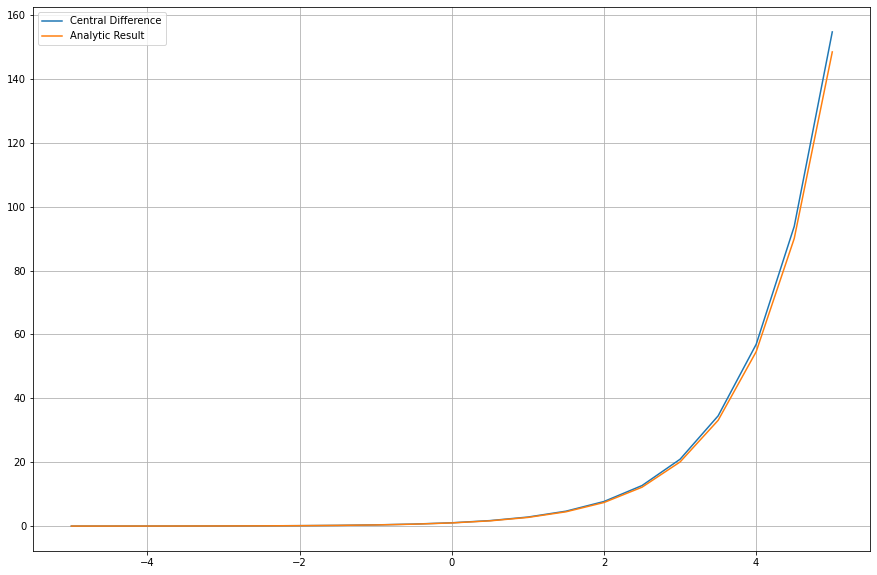

In [8]:
#Graphing
plt.figure(figsize=(15,10))
plt.plot(Points, central_diff_result, label="Central Difference")
plt.plot(Points, analytic, label= "Analytic Result")
plt.legend(["Central Difference", "Analytic Result"])
plt.grid()
plt.show()

## Root Mean Squared Errors (RMSE) 

<br/> Objective: Calculating the **"Root Mean Squared Errors (RMSE)"** of the approximated value / result through the finite difference method and the analytical solved result.
<br/>
<br/> *To do List:* Comparing the error rate of the **Euler- Forward Method** and the **central differencing scheme**.

In [9]:
from sklearn.metrics import mean_squared_error

# Root Mean Squared Error for Euler-Forward Method /EFM
MSE_EFM = mean_squared_error(analytic,Result)
RMSE_EFM = np.sqrt(MSE_EFM)

#Root Mean Squared Error for the central differencing scheme /CDS
MSE_CDS = mean_squared_error(analytic,central_diff_result)
RMSE_CDS = np.sqrt(MSE_CDS)

In [10]:
print(f"- The root mean squared errors for the 'Euler-Forward Method' is: {RMSE_EFM:.4f}")
print(f"- The root mean squared errors for the 'central differencing scheme' is: {RMSE_CDS:.4f}")

- The root mean squared errors for the 'Euler-Forward Method' is: 12.1162
- The root mean squared errors for the 'central differencing scheme' is: 1.7186


### Conclusion
<br> Thus we see that the **'central differencing scheme'** has a higher accuracy than the **Forward Euler Method** in approximating the real analytical solution of this particular first order ordinary differential equation.
<br/>
<br> **Notes:**
<br> - The **central differencing scheme** requires two neighbouring stencil points to be executed, whereas the **Forward Euler Method** only needs one. 
<br> - The **Taylor series truncation error** for the *'central differencing scheme'* is second order, whereas the *'Forward Euler Method'* is only the first order.